___
<h1 style="color:blue;">Random Forest</h1>

___

## Introduction to Random Forest

Random Forest is an ensemble learning method used for classification, regression, and other tasks that operate by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It corrects for decision trees' habit of overfitting to their training set.

### Key Concepts

- **Ensemble Learning:** The technique of combining multiple models to produce a single, superior outcome.
- **Bootstrap Aggregating (Bagging):** Random sampling with replacement is used to create multiple subsets of the training data.
- **Feature Randomness:** During the training process, each tree is trained on a random subset of features, which leads to greater diversity among the trees.
- **Majority Voting/Averaging:** For classification, the final output is based on the majority vote of the individual trees. For regression, the output is the average prediction of all trees.

### The Random Forest Algorithm

The steps for building a random forest are as follows:

1. **Create a Bootstrap Sample:** Randomly select n samples from the dataset with replacement.
2. **Build a Decision Tree:** For each bootstrap sample, grow a decision tree using a random subset of features.
3. **Repeat Steps 1 and 2:** Repeat the process k times to create k decision trees.
4. **Aggregate Results:** For classification, use majority voting to decide the final class. For regression, compute the average of all the trees' predictions.

### Benefits of Random Forest

- **Reduces Overfitting:** By averaging multiple trees, the model reduces the risk of overfitting.
- **Handles Missing Values:** Random forests can handle missing values within the dataset.
- **Maintains Accuracy:** It maintains high accuracy even if a large proportion of the data is missing.

## Data

The dataset contains various features related to bank loan approval, including customer demographics, financial information, and account details. These features will be used to predict whether a customer is approved for a personal loan.

### Attributes

- **ID:** Customer ID
- **Age:** Customer's age
- **Experience:** Customer's work experience in years
- **Income:** Customer's annual income
- **ZipCode:** Customer's residence zip code
- **Family:** Number of family members of the customer
- **CCAvg:** Average credit card spending
- **Education:** Level of education (1: Undergrad, 2: Graduate, 3: Advanced/Professional)
- **Mortgage:** Amount of mortgage taken by the customer
- **Personal Loan:** Whether the customer has taken a personal loan (0: No, 1: Yes)
- **Securities Account:** Whether the customer has a securities account (0: No, 1: Yes)
- **CD Account:** Whether the customer has a certificate of deposit account (0: No, 1: Yes)
- **Online:** Whether the customer uses online banking (0: No, 1: Yes)
- **Credit Card:** Whether the customer has a credit card issued by the bank (0: No, 1: Yes)

## Target Variable

The target variable is **Personal Loan**, which indicates whether a customer has been approved for a personal loan (0: No, 1: Yes).

## Data Source

The dataset is publicly available on Kaggle and can be found [here](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc).


___
## <span style="color:blue;">Data Analysis</span>

___

## Descriptive Analysis
- **Objective:** Summarize and describe the main features of a dataset.
- **Techniques:** Measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and frequency distributions.
- **Usage:** Provides a simple summary about the sample and measures. It helps in understanding the basic features of the data.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv('bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
# Droping the ID column
df = df.drop('ID', axis=1)

In [3]:
# Checking for missing values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
# data insights
df.describe()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP.Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal.Loan       5000 non-null   int64  
 9   Securities.Account  5000 non-null   int64  
 10  CD.Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


> As data is already cleaned, we will directly move to the Exploratory Data Analysis part.

## Exploratory Data Analysis (EDA)
- **Objective:** Explore the data to find patterns, relationships, or anomalies.
- **Techniques:** Data visualization (scatter plots, histograms, box plots), correlation analysis, and outlier detection.
- **Usage:** Helps in understanding the underlying structure of the data and formulating hypotheses for further analysis.

In [6]:
# Finiding the unique values in the dataset
df.nunique()

Age                    45
Experience             47
Income                162
ZIP.Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal.Loan           2
Securities.Account      2
CD.Account              2
Online                  2
CreditCard              2
dtype: int64

>  Making Histograms of the data to understand the distribution of the data.

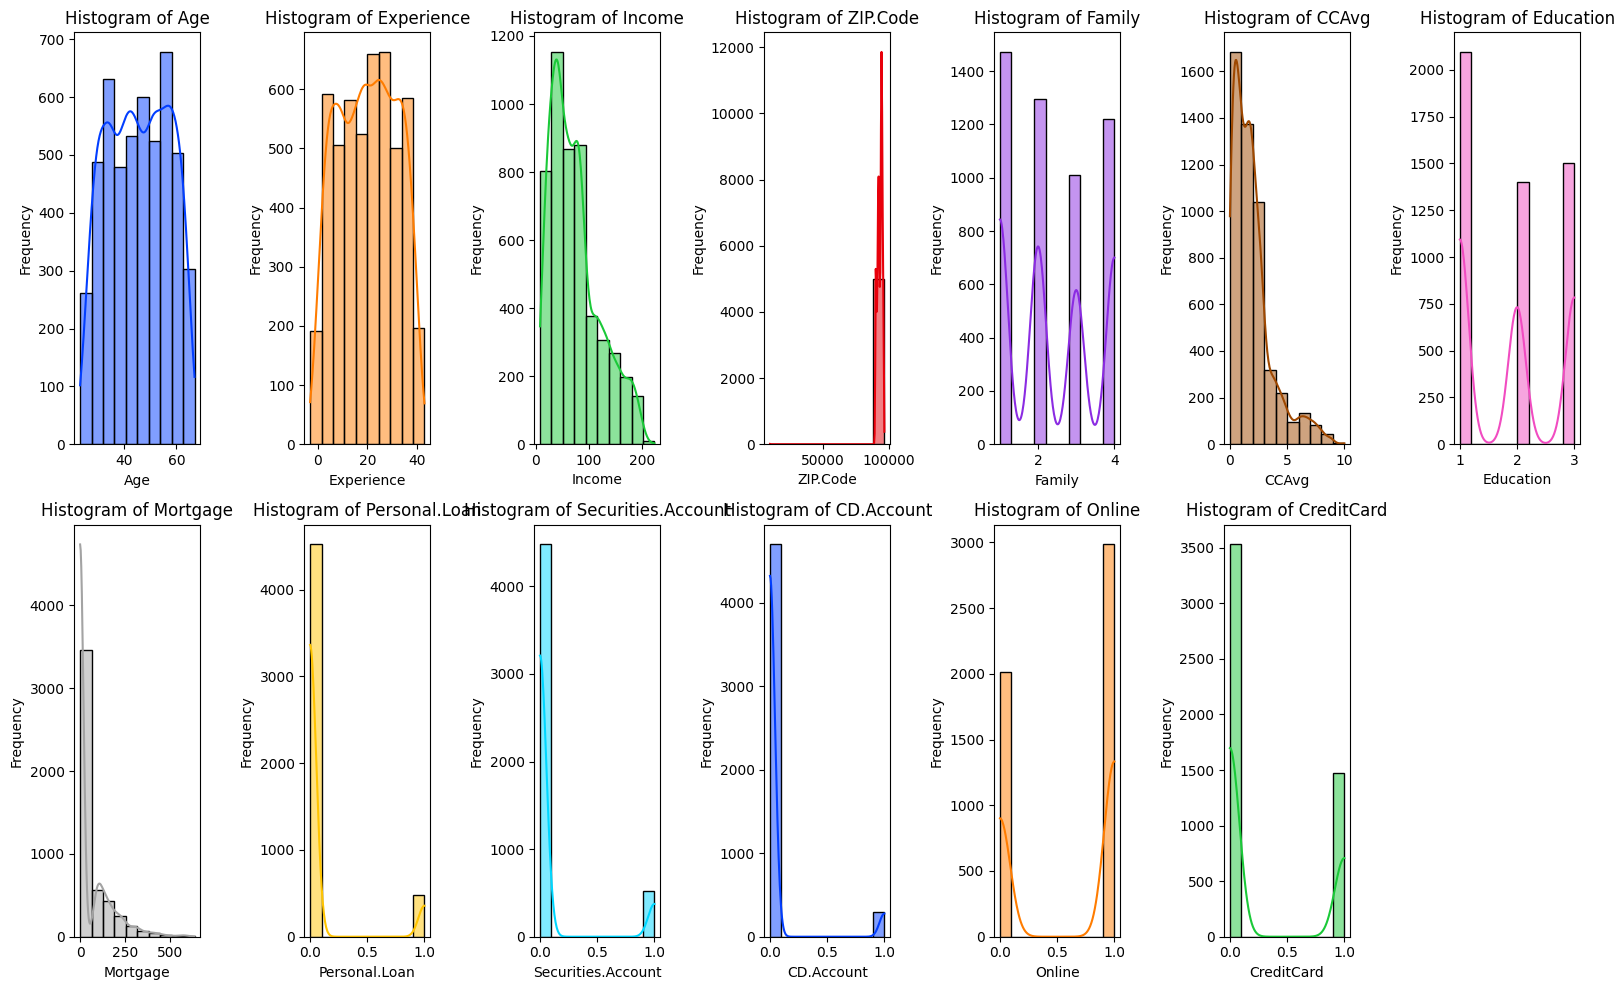

In [7]:
#Setting matplot figure size
plt.figure(figsize=(16,10))

# Define a color paltter with colors for each column
palette = sns.color_palette("bright", len(df.columns))

#Plotting histogram for each columns
for i, col in enumerate(df.columns):
    plt.subplot(2,7, i+1)
    sns.histplot(df[col], bins = 10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
# Adjust the layout
plt.tight_layout()
plt.show()
    

> Making box plots to understand the spread of the data.

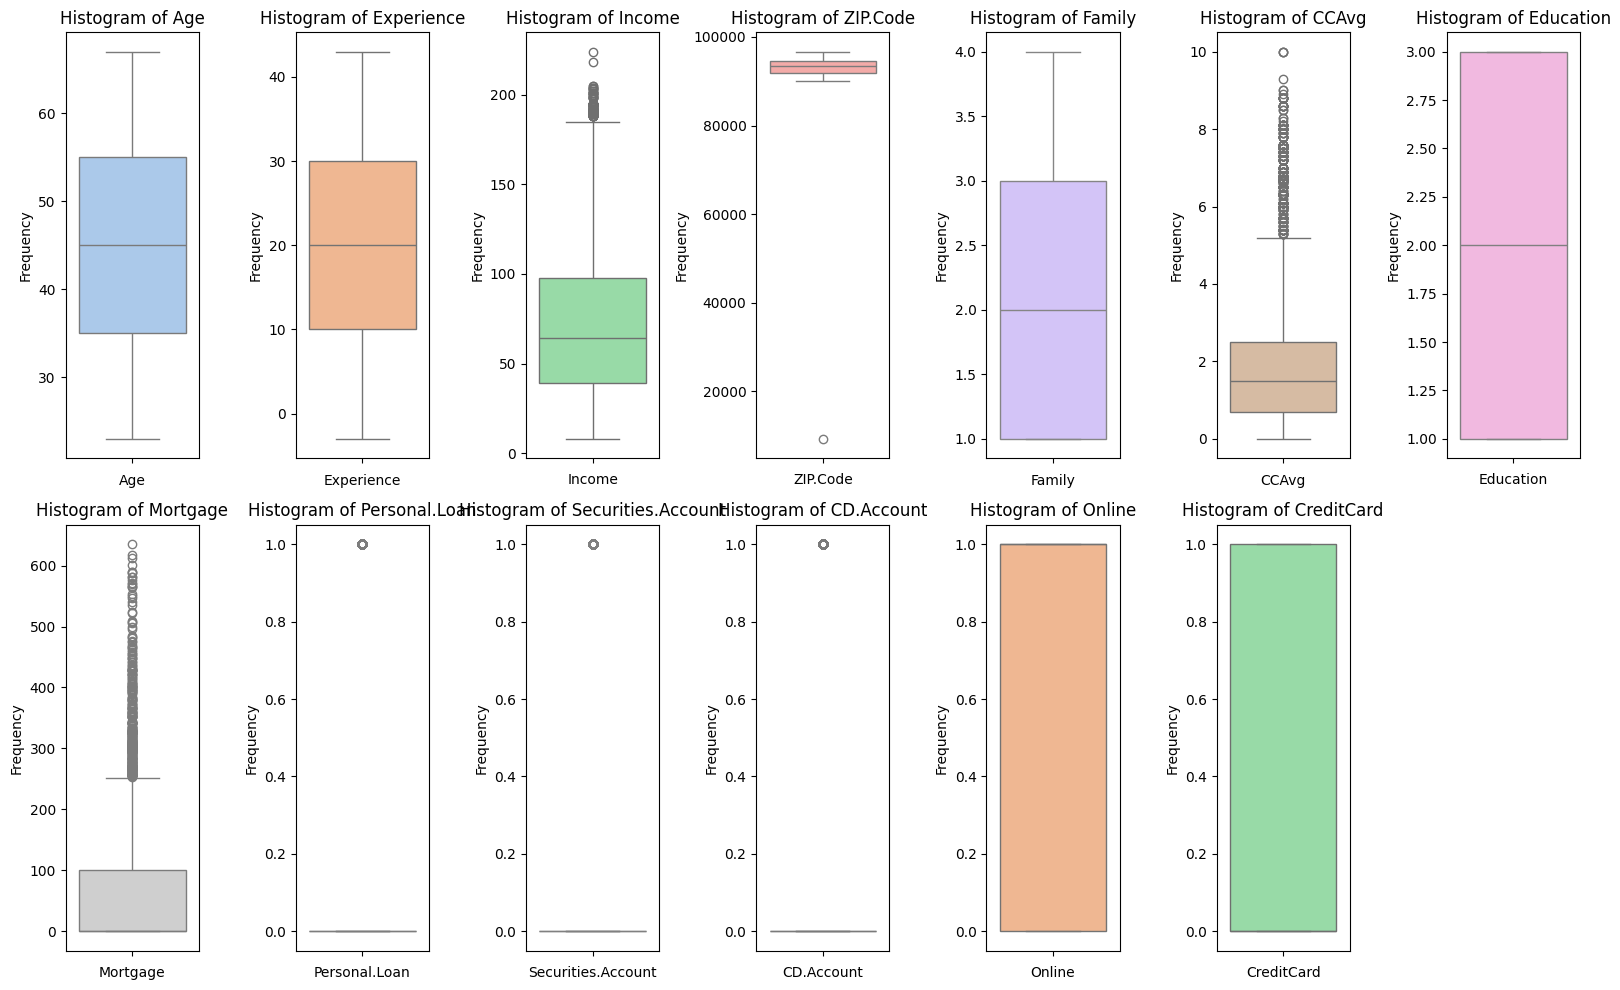

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making boxen plots to understand the spread of the data.

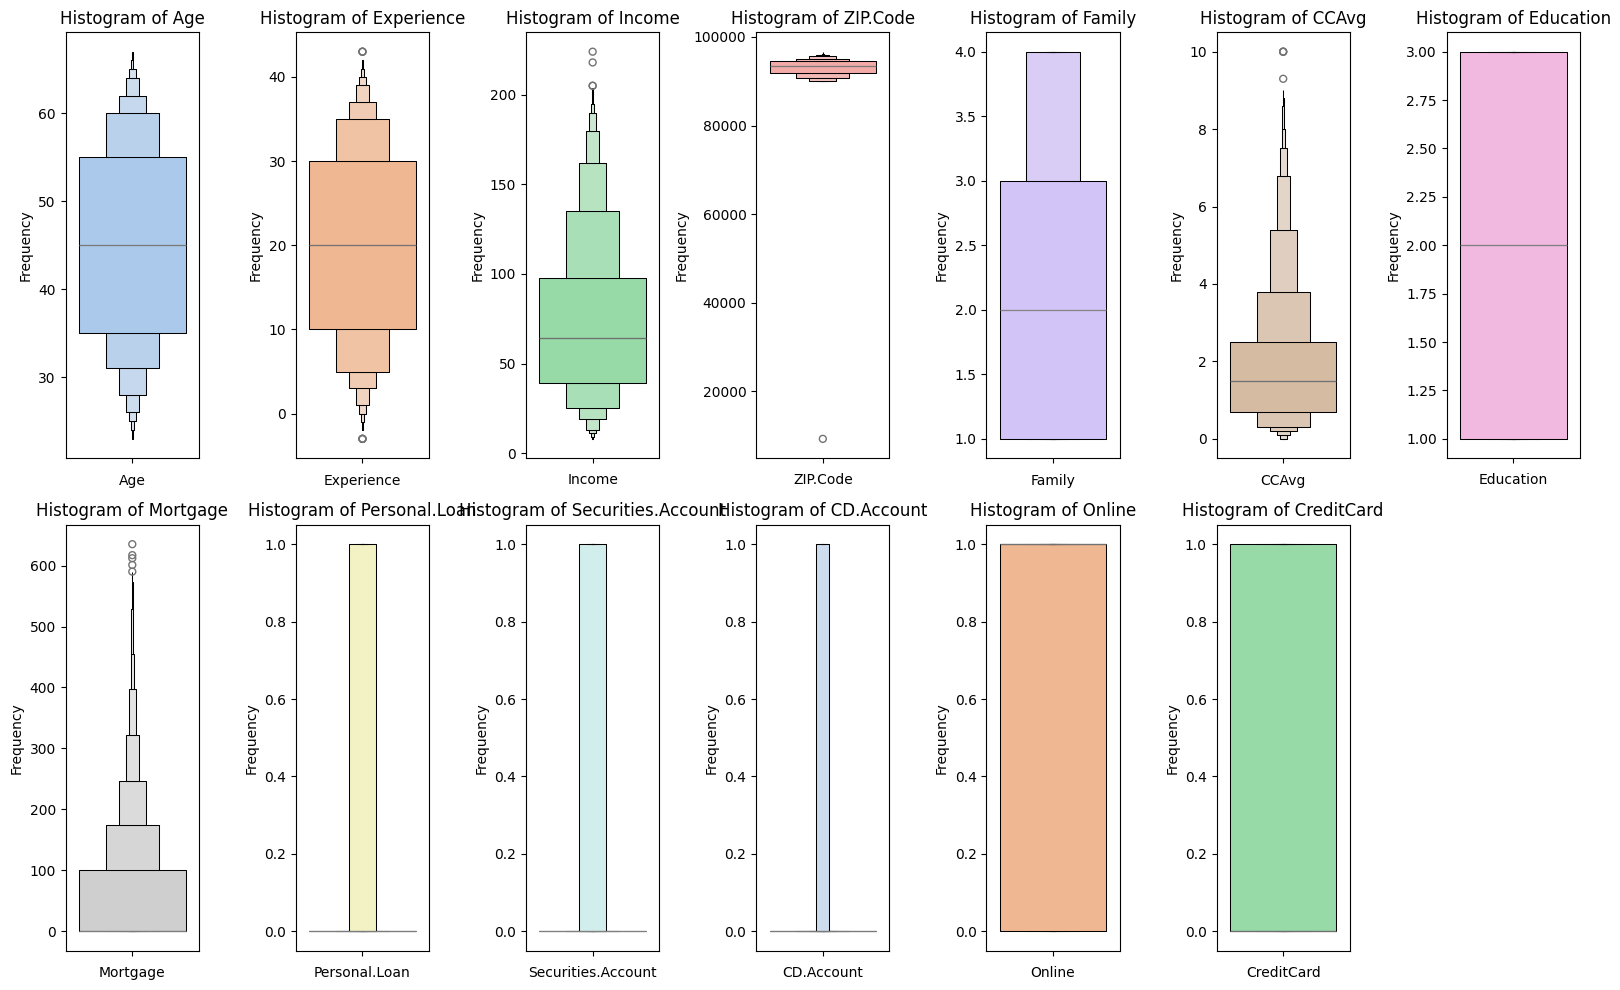

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i + 1)
    sns.boxenplot(df[col], color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making boxen plots to understand the spread of the data.

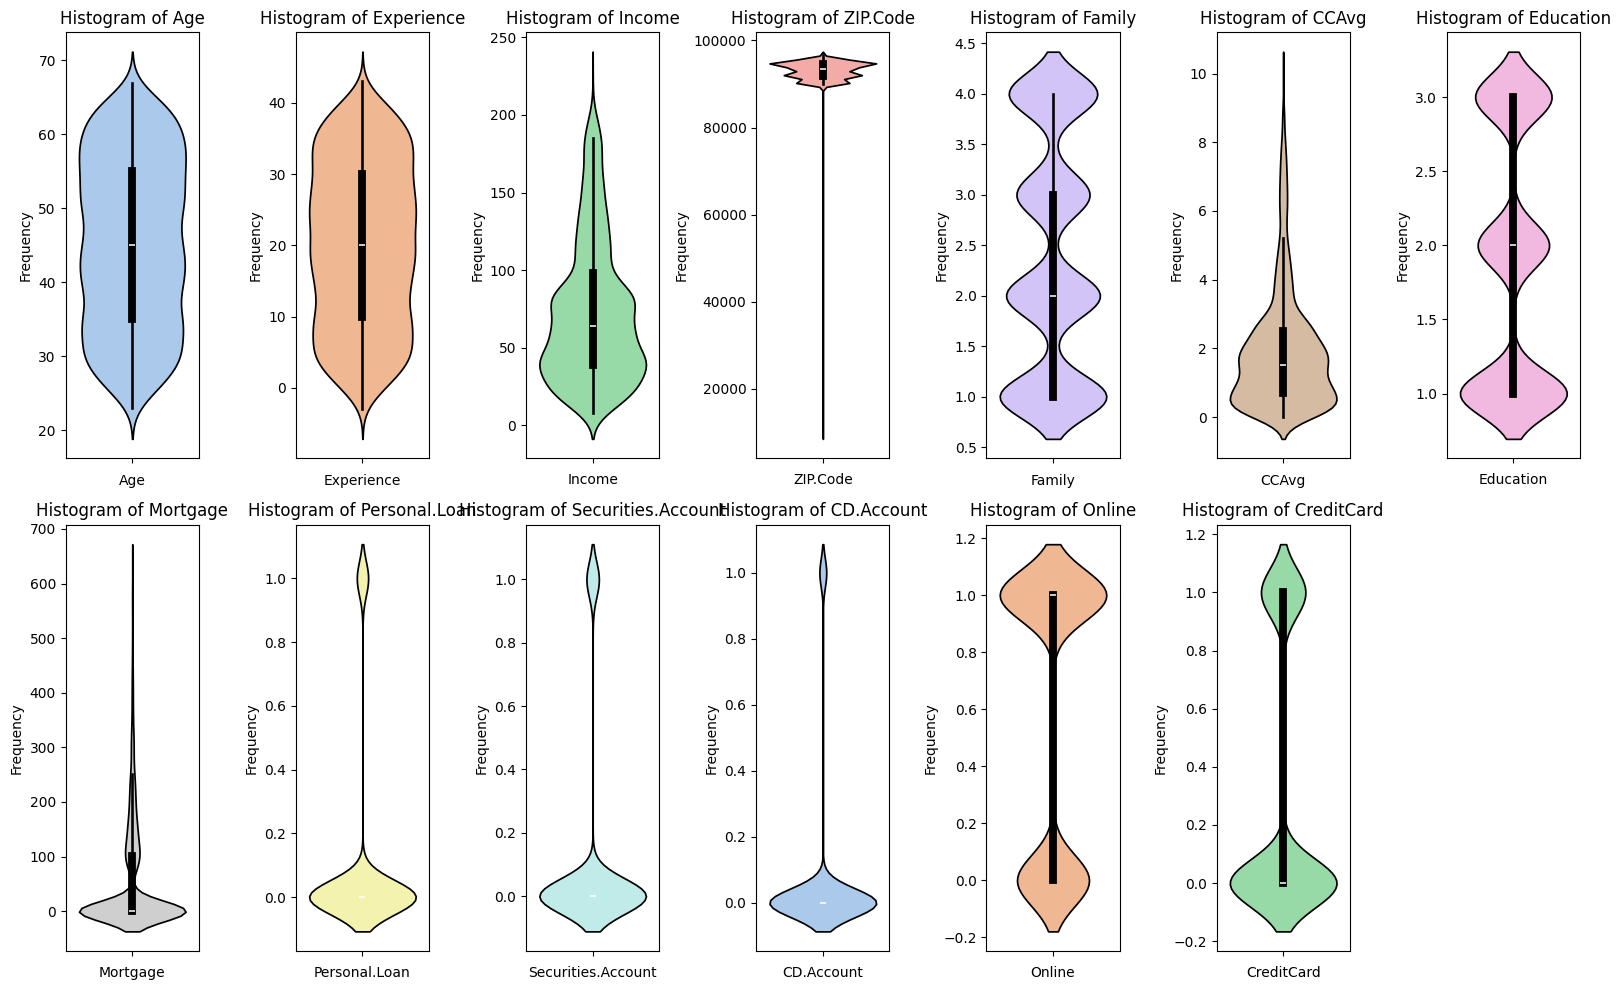

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i + 1)
    sns.violinplot(df[col], color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

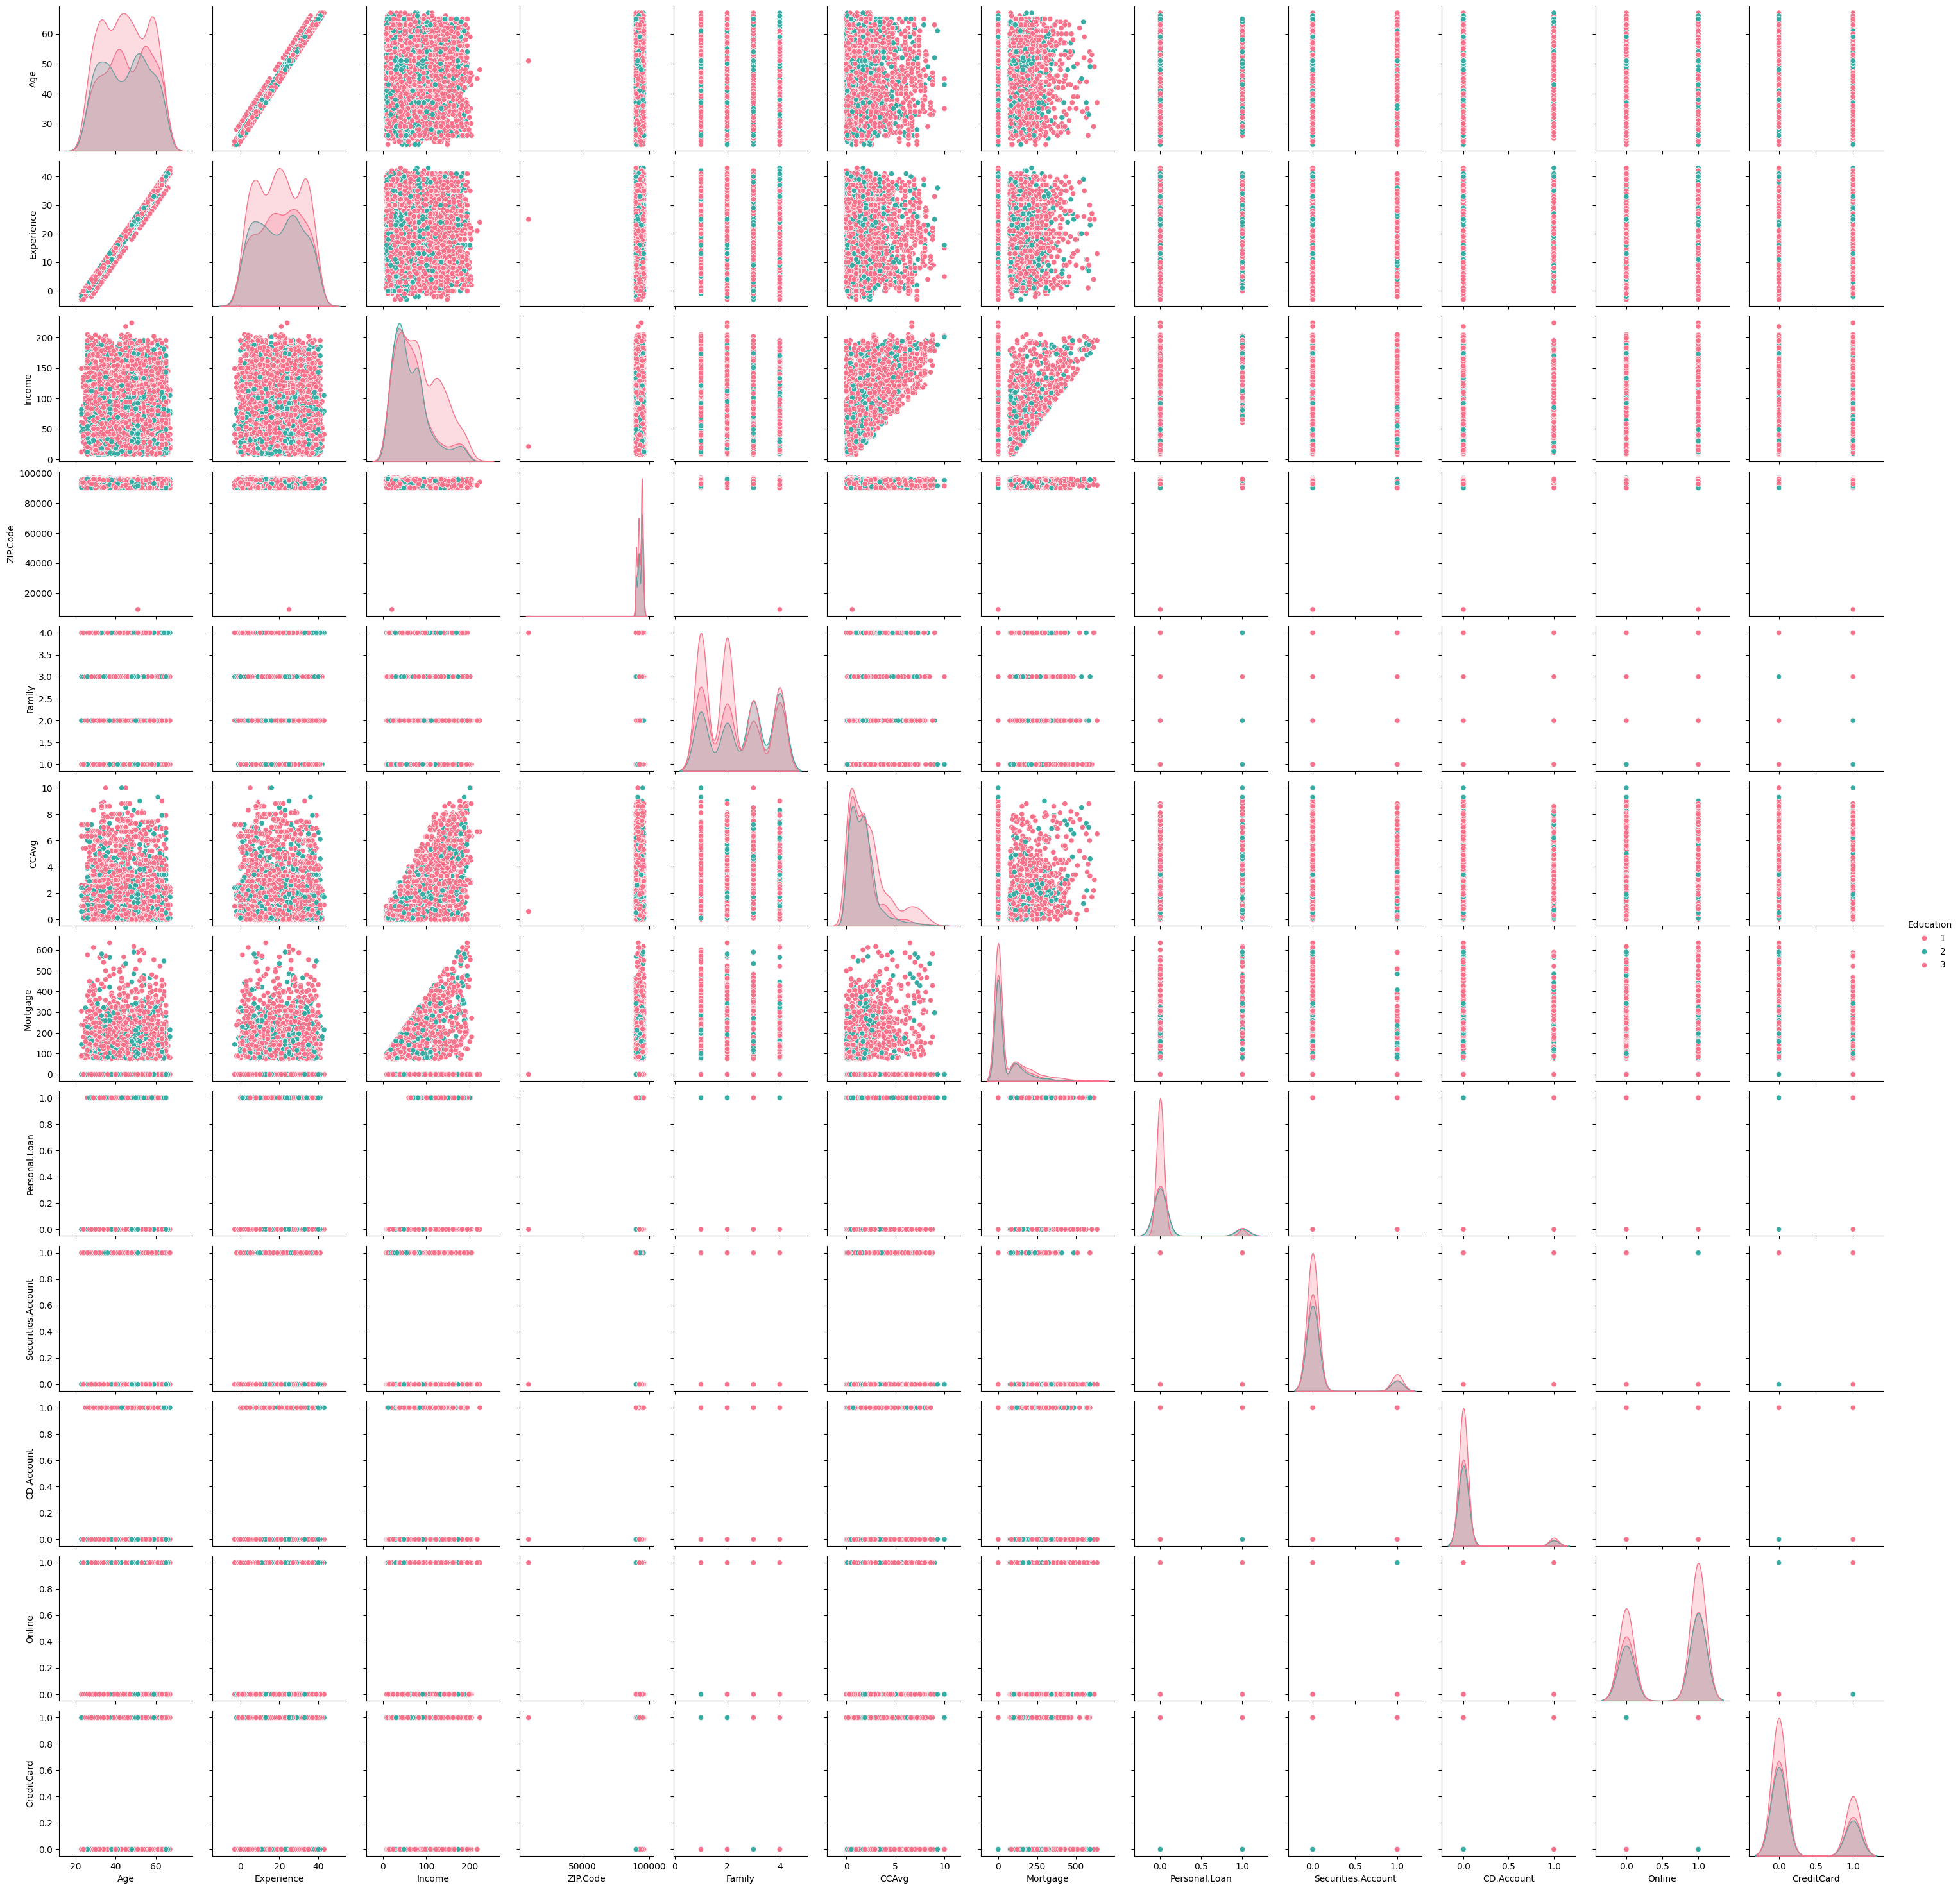

In [11]:
# making pairplot
sns.pairplot(df, hue='Education', palette="husl")

### Correlation Analysis

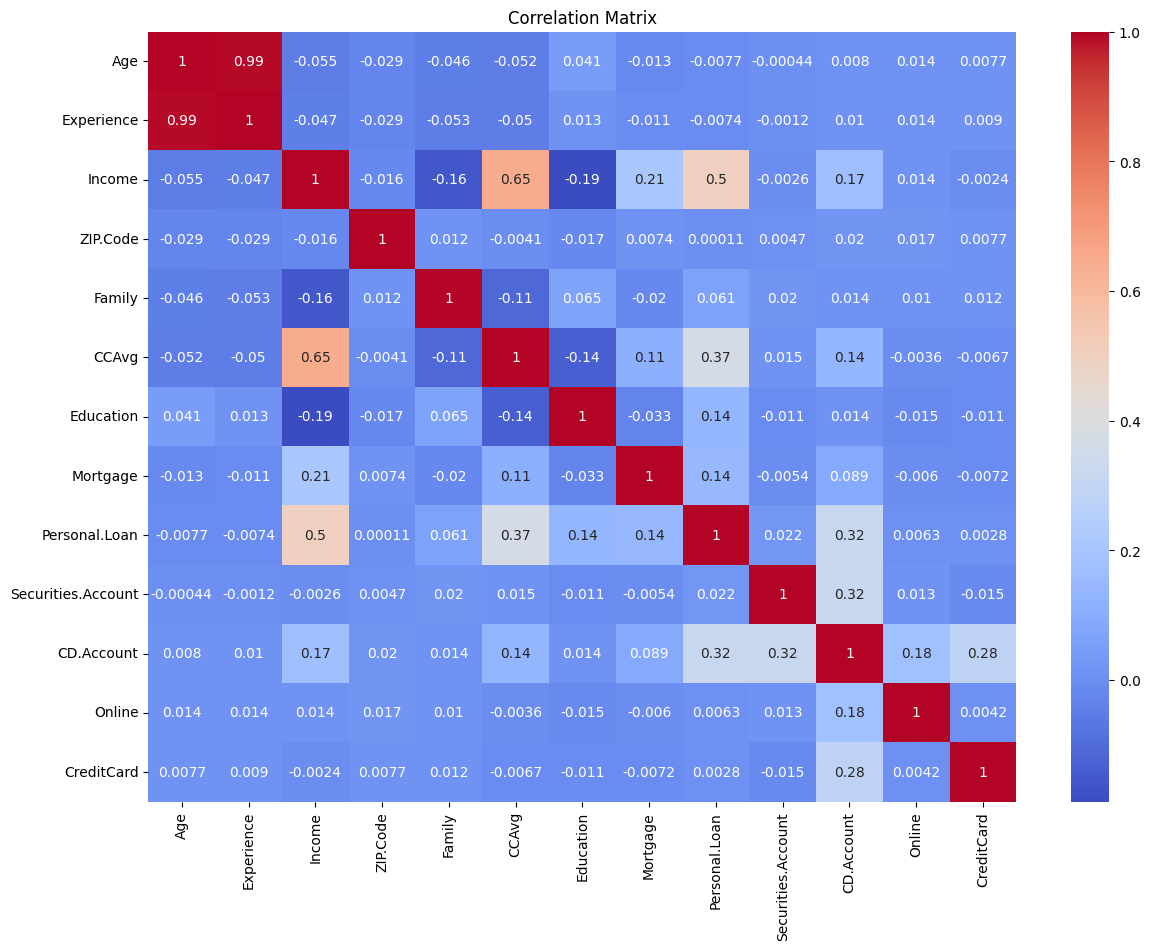

In [12]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Random Forest:

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X = df.drop(['Personal.Loan'], axis=1)
y = df['Personal.Loan']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.99


Confusion Matrix:


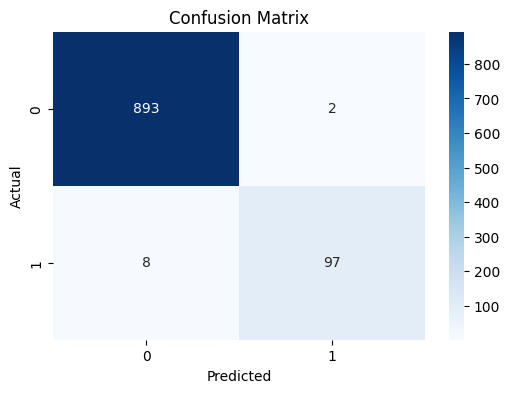

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

# plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Classification Report
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.92      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



___
## <span style="color:blue;">CONCLUSION</span>

___

In this analysis, we explored the effectiveness of the Random Forest algorithm in predicting bank loan approval based on various customer demographics and financial information. The dataset provided a comprehensive set of features that allowed us to build a robust model. Here are the key findings and insights:

1. **Data Analysis and Exploration**:
   - The dataset included 5000 entries with 13 features related to customer demographics, financial status, and account details.
   - We performed descriptive analysis to summarize the main features and explored the data through various visualizations, including histograms, box plots, boxen plots, and violin plots. This helped in understanding the distribution and spread of the data.
   - Correlation analysis revealed relationships between the features, aiding in feature selection and engineering.

2. **Model Development**:
   - We utilized the Random Forest algorithm, an ensemble learning method that constructs multiple decision trees and combines their outputs for more accurate predictions.
   - The dataset was split into training and testing sets, with 80% used for training and 20% for testing.

3. **Model Performance**:
   - The Random Forest model achieved an impressive accuracy of 99% on the test set, indicating its effectiveness in predicting bank loan approval.
   - The confusion matrix showed that the model made very few errors, with most predictions correctly classified.
   - The classification report highlighted high precision, recall, and F1-scores for both classes (loan approved and not approved), demonstrating the model's reliability and performance.

4. **Key Insights**:
   - Random Forest reduces overfitting by averaging multiple decision trees, making it a robust choice for this classification task.
   - The model maintained high accuracy even with missing values, thanks to the inherent capabilities of Random Forest.
   - Features such as income, credit card spending average (CCAvg), and family size were among the most influential in determining loan approval.

## Recommendations

Based on the findings, we recommend the following:

- **Model Deployment**: Given its high accuracy and reliability, the Random Forest model can be deployed for real-time bank loan approval predictions, potentially automating and streamlining the approval process.
- **Feature Engineering**: Further exploration of feature interactions and engineering can enhance model performance. For instance, creating new features from existing ones might reveal hidden patterns.
- **Continuous Monitoring**: Regularly updating the model with new data and monitoring its performance will ensure it adapts to changing customer behavior and financial trends.

## Acknowledgements

We would like to thank Kaggle for providing the dataset used in this analysis. The dataset can be accessed [here](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc).

This analysis demonstrated the power of ensemble learning through Random Forest, providing valuable insights and a highly accurate predictive model for bank loan approval.
```